In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\DELL LATITUDE E7250\Desktop\study\Machine learning\Python tutorial class\3. Pandas Tutorial\2. Pandas from  Data School\2. My top 25 pandas tricks\GitHub\data\imdb_1000.csv')

In [3]:
data.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
data.groupby('genre').star_rating.agg(['mean','count'])

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Family,7.850000,2
Fantasy,7.700000,1


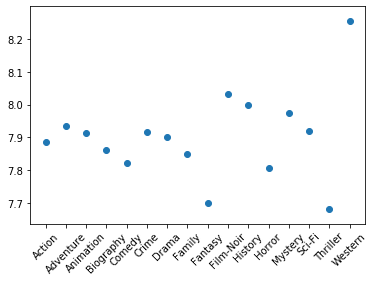

In [5]:
plt.scatter(x=range(16),y=data.groupby('genre').star_rating.mean())
plt.xticks(ticks=range(16),labels=data.groupby('genre').star_rating.mean().index,rotation=45)
plt.show()

In [6]:
data.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [7]:
import ast
from collections import Counter

In [8]:
data.actors_list=data.actors_list.apply(ast.literal_eval)

In [9]:
actorcount=Counter()

In [10]:
for _,actors in data.actors_list.iteritems():
    actorcount.update(actors)

dict_keys(['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'Marlon Brando', 'Al Pacino', 'James Caan', 'Robert De Niro', 'Robert Duvall', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'John Travolta', 'Uma Thurman', 'Samuel L. Jackson', 'Henry Fonda', 'Lee J. Cobb', 'Martin Balsam', 'Clint Eastwood', 'Eli Wallach', 'Lee Van Cleef', 'Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley', 'Brad Pitt', 'Edward Norton', 'Helena Bonham Carter', 'Orlando Bloom', 'Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Ellen Page', 'Mark Hamill', 'Harrison Ford', 'Carrie Fisher', 'Tom Hanks', 'Robin Wright', 'Gary Sinise', 'Matthew McConaughey', 'Anne Hathaway', 'Jessica Chastain', 'Jack Nicholson', 'Louise Fletcher', 'Michael Berryman', 'Toshirô Mifune', 'Takashi Shimura', 'Keiko Tsushima', 'Ray Liotta', 'Joe Pesci', 'Keanu Reeves', 'Laurence Fishburne', 'Carrie-Anne Moss', 'Alexandre Rodrigues', 'Matheus Nachtergaele', 'Leandro Firmino', 'James Stewart', '

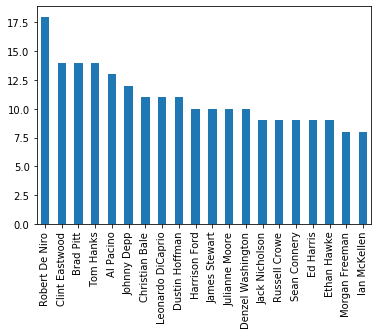

In [12]:
pd.Series(actorcount).nlargest(20).plot.bar()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
data.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[Tim Robbins, Morgan Freeman, Bob Gunton]"
1,9.2,The Godfather,R,Crime,175,"[Marlon Brando, Al Pacino, James Caan]"
2,9.1,The Godfather: Part II,R,Crime,200,"[Al Pacino, Robert De Niro, Robert Duvall]"
3,9.0,The Dark Knight,PG-13,Action,152,"[Christian Bale, Heath Ledger, Aaron Eckhart]"
4,8.9,Pulp Fiction,R,Crime,154,"[John Travolta, Uma Thurman, Samuel L. Jackson]"


In [15]:
data.actors_list

['Marlon Brando', 'Al Pacino', 'James Caan']

In [174]:
leap=pd.Series([])
for no,actors in data.actors_list.iteritems():
    if 'Ian McKellen' in actors:
        leap.loc[no]=1
    else:
        leap.loc[no]=0
(data.star_rating*leap).sum()/leap.sum()

C:\Users\DELL LATITUDE E7250\Anaconda 3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


8.200000000000001

In [194]:
def rating(names):
    leap=pd.Series([])
    actor_rating=dict()
    for name in names:
        for no,actors in data.actors_list.iteritems():
            if name in actors:
                leap.loc[no]=1
            else:
                leap.loc[no]=0
        actor_rating[name]=(data.star_rating*leap).sum()/leap.sum()
    return actor_rating

In [196]:
result=rating(list(actorcount.keys()))

C:\Users\DELL LATITUDE E7250\Anaconda 3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [204]:
actorratings=pd.Series(result)

In [207]:
actorratings

Tim Robbins         8.060000
Morgan Freeman      8.087500
Bob Gunton          9.300000
Marlon Brando       8.525000
Al Pacino           8.107692
                      ...   
Mary Steenburgen    7.400000
Billy Boyd          7.400000
JoBeth Williams     7.400000
Heather O'Rourke    7.400000
Tamara Tunie        7.400000
Length: 1777, dtype: float64

In [201]:
data.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[Tim Robbins, Morgan Freeman, Bob Gunton]"
1,9.2,The Godfather,R,Crime,175,"[Marlon Brando, Al Pacino, James Caan]"
2,9.1,The Godfather: Part II,R,Crime,200,"[Al Pacino, Robert De Niro, Robert Duvall]"
3,9.0,The Dark Knight,PG-13,Action,152,"[Christian Bale, Heath Ledger, Aaron Eckhart]"
4,8.9,Pulp Fiction,R,Crime,154,"[John Travolta, Uma Thurman, Samuel L. Jackson]"


In [221]:
sum=0
for i in data.actors_list[3]:
    try:
        sum+=actorratings[i]
    except KeyError:
        pass
print(sum)

Christian Bale
Heath Ledger
Aaron Eckhart
24.677272727272726


In [235]:
def actorbase(data):
    rate=pd.Series([])
    for no,dat in data.actors_list.iteritems():
        Sum=0
        for i in dat:
            try:
                Sum+=actorratings[i]
            except KeyError:
                pass
        rate[no]=Sum
    return rate

In [237]:
rate=actorbase(data)

C:\Users\DELL LATITUDE E7250\Anaconda 3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [241]:
rate.name='rate'

In [243]:
data2=pd.concat([data,rate],axis=1)

In [244]:
import seaborn as sns

C:\Users\DELL LATITUDE E7250\Anaconda 3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


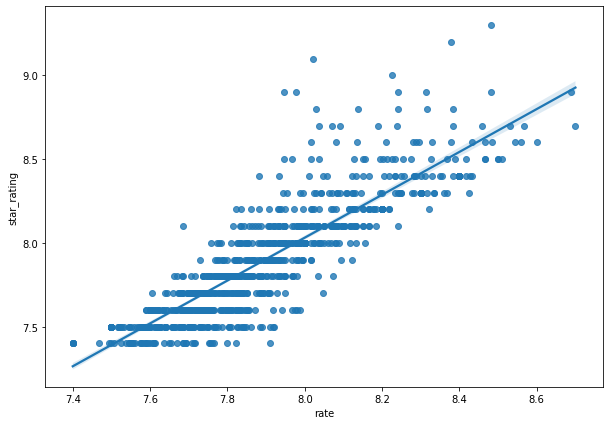

In [247]:
sns.regplot(data2.rate/3,data2.star_rating)

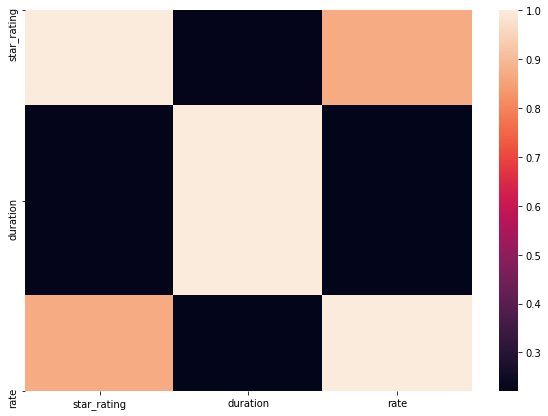

In [248]:
sns.heatmap(data2.corr())

In [250]:
data3=data2.drop('title',axis=1)

In [251]:
data3.head()

,star_rating,content_rating,genre,duration,actors_list,rate
0,9.3,R,Crime,142,"[Tim Robbins, Morgan Freeman, Bob Gunton]",25.447500
1,9.2,R,Crime,175,"[Marlon Brando, Al Pacino, James Caan]",25.132692
2,9.1,R,Crime,200,"[Al Pacino, Robert De Niro, Robert Duvall]",24.066422
3,9.0,PG-13,Action,152,"[Christian Bale, Heath Ledger, Aaron Eckhart]",24.677273
4,8.9,R,Crime,154,"[John Travolta, Uma Thurman, Samuel L. Jackson]",24.943333


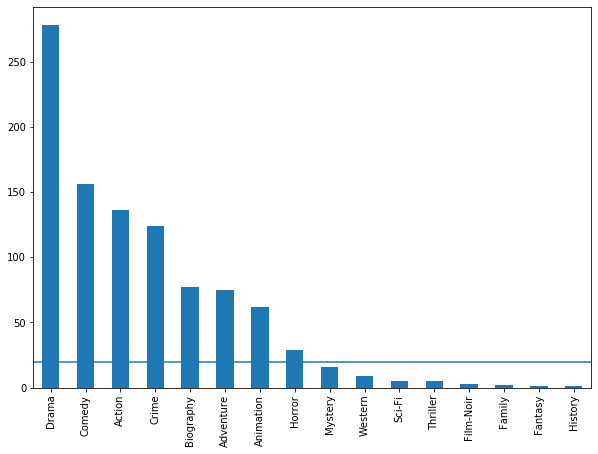

In [258]:
data3.genre.value_counts().plot.bar()
plt.axhline(20)

In [280]:
data3.genre.loc[data.genre.isin(['Mystery','Western','Sci-Fi','Thriller','Film-Noir','Family','Fantasy','History'])]='others'

C:\Users\DELL LATITUDE E7250\Anaconda 3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [281]:
data3.genre.unique()

array(['Crime', 'Action', 'Drama', 'others', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Horror'], dtype=object)

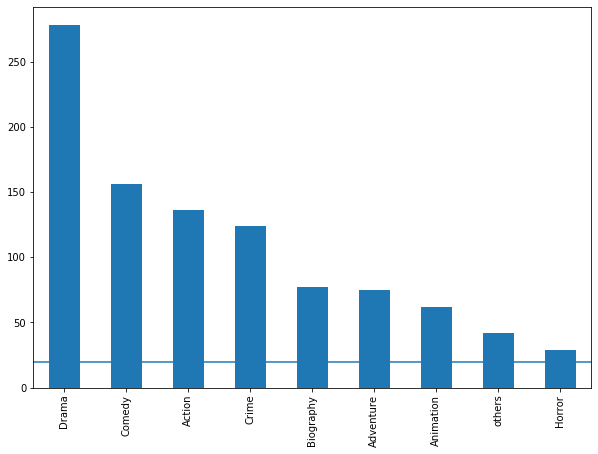

In [282]:
data3.genre.value_counts().plot.bar()
plt.axhline(20)

In [283]:
data3.head()

,star_rating,content_rating,genre,duration,actors_list,rate
0,9.3,R,Crime,142,"[Tim Robbins, Morgan Freeman, Bob Gunton]",25.447500
1,9.2,R,Crime,175,"[Marlon Brando, Al Pacino, James Caan]",25.132692
2,9.1,R,Crime,200,"[Al Pacino, Robert De Niro, Robert Duvall]",24.066422
3,9.0,PG-13,Action,152,"[Christian Bale, Heath Ledger, Aaron Eckhart]",24.677273
4,8.9,R,Crime,154,"[John Travolta, Uma Thurman, Samuel L. Jackson]",24.943333


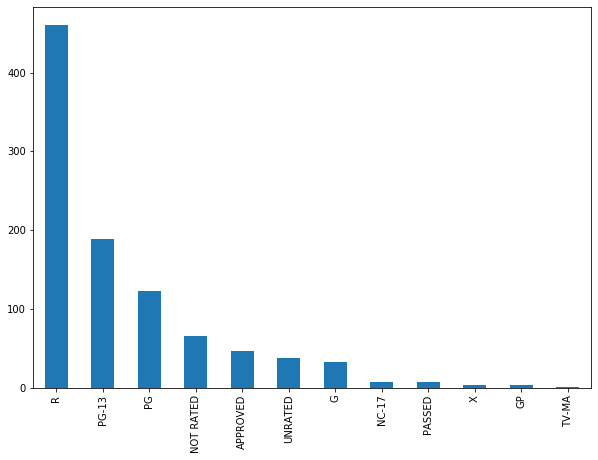

In [284]:
data3.content_rating.value_counts().plot.bar()

In [287]:
data3.content_rating.fillna(method='ffill',inplace=True)

In [288]:
data3.isna().sum()

star_rating       0
content_rating    0
genre             0
duration          0
actors_list       0
rate              0
dtype: int64

In [291]:
learn=pd.get_dummies(data3.drop(['actors_list'],axis=1),drop_first=True)

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [300]:
X=learn.drop('star_rating',axis=1)
y=learn.star_rating
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=48)

In [308]:
rand=RandomForestRegressor(n_estimators=100,max_depth=5)
rand.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [309]:
rand.score(X_test,y_test)

0.7476620841001848

In [304]:
linalg=LinearRegression()
linalg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [305]:
linalg.score(X_test,y_test)

0.723070789228752